In [29]:
#importing the necessary packages 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm


In [3]:
# loading the dataset 
marketing_data = pd.read_csv("marketing_data.csv")

#display data 
marketing_data.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


In [7]:
#checking for NaN types in data 
marketing_data.isna().any(axis=1).sum()

np.int64(3)

In [ ]:
#removing NaN types from the data 
# axis=0 , refers to the row axis
marketing_data = marketing_data.dropna(axis=0)

In [10]:
#re-checking if all the Nan types where removed 
marketing_data.isna().any(axis=1).sum()

np.int64(0)

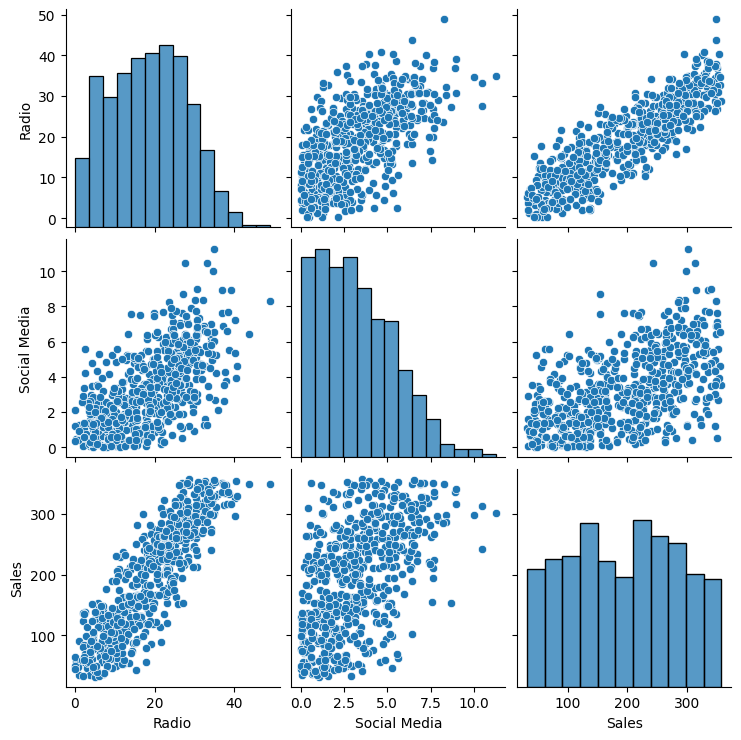

In [11]:
# conducting exploratory data analysis 
#creating a pair plot using sns
sns.pairplot(marketing_data)
plt.show()

In [14]:
# our categorical variables are TV and Influencer 
# To characterize the relationship between the categorical variables and Sales. we 
#find the mean Sales for each Category in TV and the mean Sales for ech category in Influencer

#calculating the mean sales for each TV category 
print(marketing_data.groupby("TV")["Sales"].mean())
print('')

#calculating the man sales for each Influencer category
print(marketing_data.groupby("Influencer")["Sales"].mean())

TV
High      300.529591
Low        91.716309
Medium    199.023461
Name: Sales, dtype: float64

Influencer
Macro    206.641805
Mega     180.385096
Micro    198.655080
Nano     189.742830
Name: Sales, dtype: float64


The average Sales for High TV promotions is considerably higher than for Medium and Low TV promotions. TV may be a strong predictor of Sales.

The categories for Influencer have different average Sales, but the variation is not substantial. Influencer may be a weak predictor of Sales.

These results can be investigated further when fitting the multiple linear regression model.

In [15]:
# CLeaning column names
# renaming all column names in the data that contain a space

marketing_data = marketing_data.rename(columns={"Social Media":"Social_Media"})

#checking to see if changes have been applied successfully
marketing_data.head(1)

,TV,Radio,Social_Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222


In [16]:
# Constructing the model
#first we need the ols formula 
#second we need the ols data 

#ols formula
ols_formula = "Sales ~ C(TV) + Radio"

#creating an OLS model
OLS = ols(formula=ols_formula, data=marketing_data)

#fitting the model
model = OLS.fit()

#model results 
model_results = model.summary()


#display
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Sun, 16 Nov 2025   Prob (F-statistic):          1.61e-287
Time:                        18:16:50   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Checking for model assumptions
# we add multicollinearity in multiple linear regression so the assumptions are 
# 1. linearity 
# 2. Normality 
# 3. Independent variables
# 4. Homoscedasticity 
# 5. No multicollinearity

## cheking for linearity 

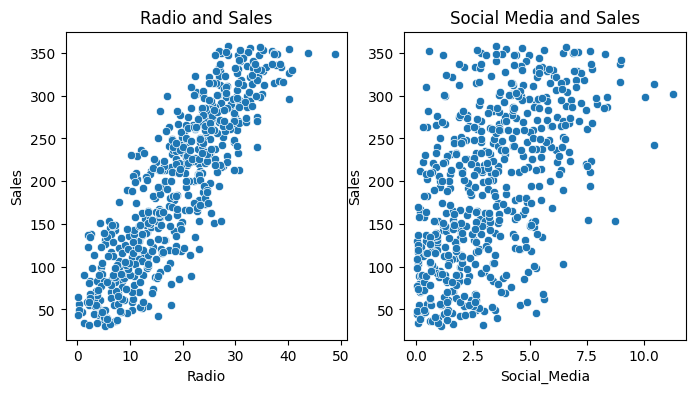

In [22]:
# creating a scatterplot for each independent variable and dependent variable

#creating a 1x2 plot figure 
fig, axes = plt.subplots(1, 2, figsize= (8, 4))

#creating a scatterplot between Radio and sales 
sns.scatterplot(x = marketing_data["Radio"], y = marketing_data["Sales"], ax=axes[0])

#setting the title for the first plot
axes[0].set_title("Radio and Sales")

#creating a scatterplot between Social media and Sales
sns.scatterplot(x=marketing_data["Social_Media"], y=marketing_data["Sales"], ax=axes[1])

#setting the title for the second plot
axes[1].set_title("Social Media and Sales")

#showing 
plt.show()

The linearity assumption holds on the first scatterplot the one for Radio and Sales.
Social Media was not included in the preceding multiple lienar regression model, but it does not appear to have a lienar relationship with Sales

## Model assumption independent variable

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

## Model assumption Normality 

Using the Histogram and  Quantile-Quantile plot to check for normality assumption 

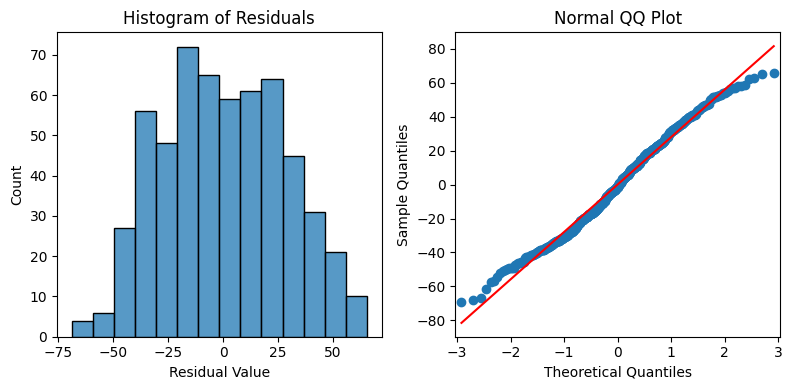

In [33]:
# first we need the residuals and the fitted values 

#obtaining residuals
residuals = model.resid

#creating a 1x2 plot figure 
fig, axes =plt.subplots(1, 2, figsize=(8, 4))

#Creating a histogram with the residuals
sns.histplot(residuals, ax=axes[0])

#set the label of the histogram
axes[0].set_xlabel("Residual Value")

#setting the title of the residual plot 
axes[0].set_title("Histogram of Residuals")


#creating Q-Q plot of the residuals
sm.qqplot(residuals, line='s', ax= axes[1])

#Setting title for the q-q plot 
axes[1].set_title("Normal QQ Plot")


#using matplotlib's tight_layout() function to add space between plots for a cleaner look
plt.tight_layout()

#showing the plot
plt.show()

The histogram of the residuals are approximately normally distributed, which supports that the normality assumption is met for this model. The residuals in the Q-Q plot form a straight line, further supporting that this assumption is met.

## Model assumption Homoscedasticity (constant variance)

Checking that the **constant variance assumption** is not violated by creating a scatterplot with the fitted values and residuals. Adding a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

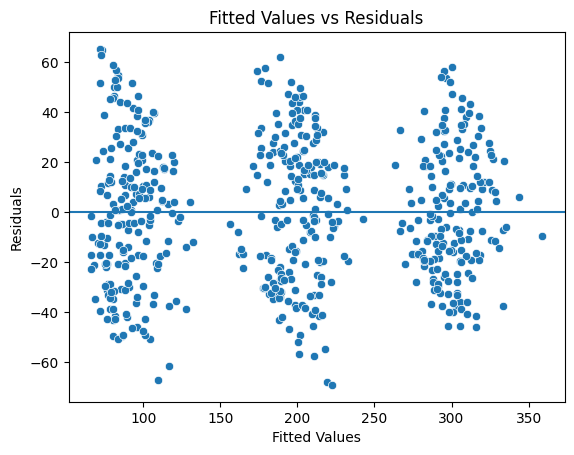

In [40]:
# creating a scatterplot with the fitted values from the model and the residuals

fig = sns.scatterplot(x=model.fittedvalues, y=model.resid)


#setting the x axis label
fig.set_xlabel("Fitted Values")

#setting the y axis label
fig.set_ylabel("Residuals")


#setting the title
fig.set_title("Fitted Values vs Residuals")

#adding the line at y = 0 to visualize the variance of residuals above and below 0
fig.axhline(0)

#showing the plot
plt.show()

The fitted values are in three groups because the categorical variable is dominating in this model, meaning that TV is the biggest factor that decides the sales.

However, the variance where there are fitted values is similarly distributed, validating that the assumption is met.


## Model assumption No multicollinearity 

The **no multicollinearity assumption** states that no two independent variables ($X_i$ and $X_j$) can be highly correlated with each other. 

Two common ways to check for multicollinearity are to:

* Create scatterplots to show the relationship between pairs of independent variables
* Use the variance inflation factor to detect multicollinearity

Use one of these two methods to check your model's no multicollinearity assumption.

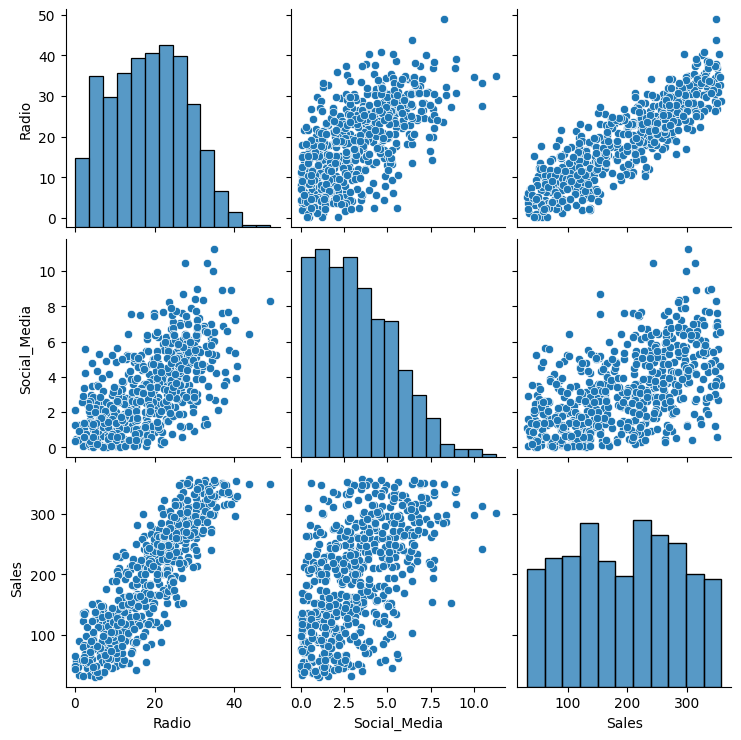

In [42]:
#creating a scatterplot of the data
sns.pairplot(marketing_data)
plt.show()

In [47]:
# calculating the variance inflation factor.

# importing variance_inflation_factor from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

# creating a subset of the data with the continuous independent variables
X = marketing_data[["Radio", "Social_Media"]]

# calculating the variance inflation factor for each variable 
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#creating a dataframe with VIF results fro the column names in x
df_vif = pd.DataFrame(vif, index=X.columns, columns= ["VIF"])

# showcasing the dataframe
df_vif

,VIF
Radio,4.93238
Social_Media,4.93238



The preceding model only has one continous independent variable, meaning there are no multicollinearity issues. 

If a model used both `Radio` and `Social_Media` as predictors, there would be a moderate linear relationship between `Radio` and `Social_Media` that violates the multicollinearity assumption. Furthermore, the variance inflation factor when both `Radio` and `Social_Media` are included in the model is 5.17 for each variable, indicating high multicollinearity.